In [91]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import math
import statistics
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv(r"C:\Users\Adamek\Desktop\HawkTail.csv", index_col = 0)

In [69]:
df[["Species"][:20]]

,Species
1,RT
2,RT
3,RT
4,SS
5,RT
...,...
834,RT
835,SS
836,RT
837,RT


In [70]:
df = df[df.Species!= "SS"]

In [71]:
df

,Species,Tail
1,RT,219
2,RT,221
3,RT,235
5,RT,230
6,RT,212
...,...,...
833,RT,217
834,RT,224
836,RT,211
837,RT,207


In [76]:
df[["Tail"]]

,Tail
1,219
2,221
3,235
5,230
6,212
...,...
833,217
834,224
836,211
837,207


In [173]:
data = df["Tail"]

Text(0.5, 1.0, 'długość ogona myszołowa rdzawosternego')

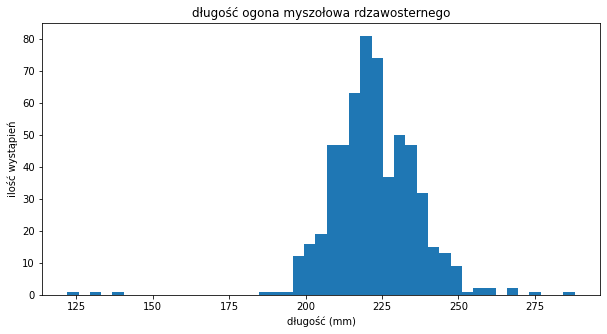

In [183]:
plt.figure(figsize = (10,5))
plt.hist(data, bins=45)
plt.xlabel("długość (mm)")
plt.ylabel("ilość wystąpień")
plt.title("długość ogona myszołowa rdzawosternego")

{'whiskers': [<matplotlib.lines.Line2D at 0xaa8f31be20>,
 'caps': [<matplotlib.lines.Line2D at 0xaa8f329520>,
 'boxes': [<matplotlib.lines.Line2D at 0xaa8f31bac0>],
 'medians': [<matplotlib.lines.Line2D at 0xaa8f329b80>],
 'fliers': [<matplotlib.lines.Line2D at 0xaa8f329ee0>],
 'means': []}

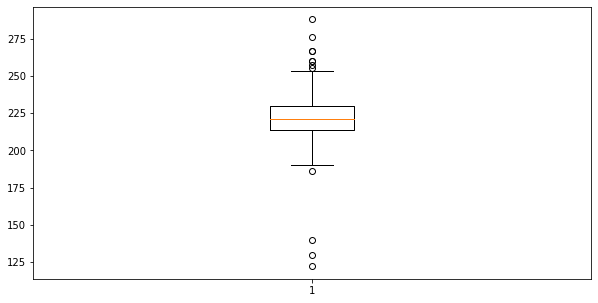

In [175]:
x = np.linspace(0.9, 1.1, 2) 

plt.figure(figsize = (10,5))
plt.boxplot(data)
#plt.plot(x, [np.median(data), np.median(data)], "--r")

Text(0.5, 1.0, 'Dystrybuanta empiryczna')

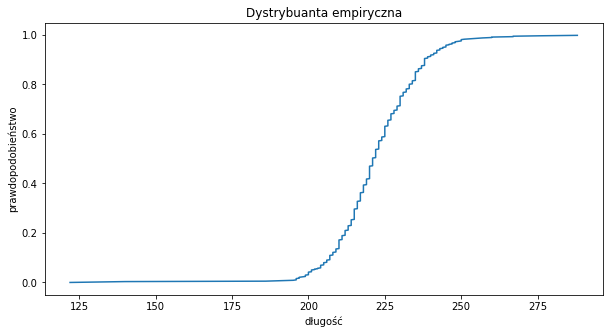

In [180]:
xs = np.sort(data)
ys = np.arange(len(xs))/float(len(xs))

plt.figure(figsize= (10,5))
plt.plot(xs, ys)
plt.xlabel("długość")
plt.ylabel("prawdopodobieństwo")
plt.title("Dystrybuanta empiryczna")

## Miary położenia

In [87]:
np.mean(data) # arytmetyczna

222.14904679376085

In [89]:
statistics.harmonic_mean(data) # harmoniczna

221.08542188040693

In [92]:
sp.stats.mstats.gmean(data) #geometryczna

221.6432531902273

In [99]:
sp.stats.trim_mean(data, 0.1) #ucinana 10%

222.1036717062635

In [105]:
np.mean(scipy.stats.mstats.winsorize(data, limits = [0.1, 0.1])) #średnia winsorowska

222.18197573656846

In [108]:
Values = []

Values.append(np.quantile(data, 0.25))
Values.append(np.quantile(data, 0.5))
Values.append(np.quantile(data, 0.75))

print(Values) #kwartyle

[214.0, 221.0, 230.0]


## Miary rozproszenia

In [111]:
max(data) - min(data) # rozstęp

166

In [112]:
Values[2] - Values[0] #IQR = Q3 - Q1

16.0

In [114]:
statistics.variance(data) # wariancja nieobciążona

210.56802426343154

In [115]:
statistics.pvariance(data) # wariancja obciążona

210.2030883461639

In [119]:
math.sqrt(statistics.variance(data)) # DX nieobciążone

14.510962210116583

In [122]:
math.sqrt(statistics.variance(data))/np.mean(data) * 100 # współczynnik zmienności

6.5320839407374525

## Miary asymetrii

In [124]:
sp.stats.skew(data) # skośność

-0.848991490399675

## Miary spłaszczenia

In [125]:
sp.stats.kurtosis(data) #kurtoza

8.407394295055306